# Assignment 1

Use a suitable data-set from kaggle.com. Identify whether any variable has any missing values. Impute
some of the variables that have missing values using their corresponding mean values. Verify whether
your task has been correctly done. Compute the Kurtosis and Skewness of the variables and interpret the
results obtained. Determine the "summary" information for the numerical variables. Identify the
"distributions" of the numerical variables and plot the distributions. Transform the numeric variables into
their natural log values and scale [0 - 1] values. Check whether the numeric variables follow normality
conditions. Find the correlation matrix for all the variables in the dataset and plot the graph of the
correlation matrix. From the given dataset partition the data into 70-15-15 divisions so to construct the
training, validation and test datasets. Any additional ways of Data Exploration & Visualization will be
appreciated.


In [90]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plot

from scipy.stats import kurtosis, skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve

In [38]:
df = pd.read_csv('./ToyotaCorolla - Dirty.csv', na_values=' ')

df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,NaN,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,NaN,90,0,0,2000.0,3,1170.0


In [69]:
df.isna().sum()

Price        0
Age          0
KM           0
FuelType     5
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [51]:
df[14:].head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
14,22500,32.0,34131,Petrol,192,1,0,1800.0,3,1185.0
15,22000,28.0,18739,Petrol,192,0,0,1800.0,3,1185.0
16,22750,30.0,34000,NaN,192,1,0,1800.0,3,1185.0
17,17950,24.0,21716,Petrol,110,1,0,1600.0,3,1105.0
18,16750,24.0,25563,Petrol,110,0,0,1600.0,3,1065.0


In [40]:
df.dtypes

Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

In [65]:
print(np.any(np.isnan(df['Age'])))
print(np.all(np.isfinite(df['Age'])))

False
True


In [74]:
def vibe_check(data, columnName):
    print(f"Skewness of {columnName} is ", skew(data[columnName]))
    print(f"Kurtosis of {columnName} is ",kurtosis(data[columnName]))

In [75]:
vibe_check(df, 'Age')
vibe_check(df, 'CC')
vibe_check(df, 'Weight')

Skewness of Age is  -0.8359152727598583
Kurtosis of Age is  -0.03308304825169417
Skewness of CC is  0.6058671290246356
Kurtosis of CC is  0.47105167367830836
Skewness of Weight is  3.1314953738755325
Kurtosis of Weight is  19.66270289243083


In [68]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['CC'].fillna(df['CC'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

In [82]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.000000,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,56.098601,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.000000,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.000000,38500,NaN,90,0,0,2000.0,3,1170.0


In [76]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,56.098601,68533.259749,101.502089,0.674791,0.055710,1566.622470,4.033426,1072.249650
std,3626.964585,18.446213,37506.448872,14.981080,0.468616,0.229441,186.786787,0.952677,52.393485
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [83]:
df['FuelType'] =  LabelEncoder().fit_transform(df['FuelType'])

df['FuelType'].head()

0    1
1    1
2    1
3    1
4    3
Name: FuelType, dtype: int32

<AxesSubplot:>

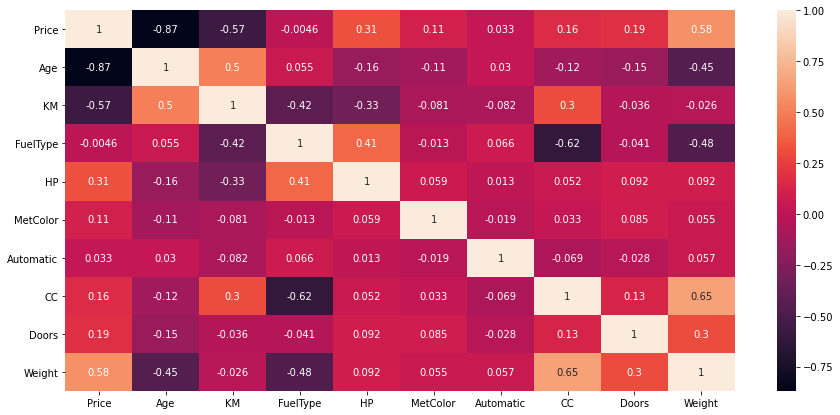

In [91]:
plot.figure(1, (15, 7))
sb.heatmap(df.corr(), annot=True)


In [85]:
x = df.drop('Price', axis=1)
y = df['Price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(1148, 9) (288, 9) (1148,) (288,)


In [110]:
model = LinearRegression().fit(xtrain, ytrain)

predictions = model.predict(xtest)

<AxesSubplot:title={'center':'Residual Plot'}, ylabel='Price'>

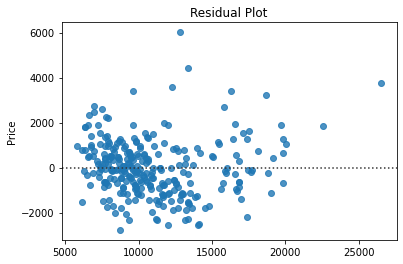

In [108]:
plot.title("Residual Plot")
sb.residplot(x=predictions, y=ytest)